# Cluster Analysis
 - multivariate stat technique
 - group observations based on features/variables
 - maximize similarity of observations within a cluster
      - distance between points in a cluster = within-cluster sum of squares WCSS (w/in ANOVA framework)
      - WCSS where cluster = n of inputs is 0
      - WCSS where cluster = 1 is MAX
      - Ideal WCSS: small # clusters, with low WCSS
 - maximize dissimilarity between clusters
 - analysis can be exploratory, confirmatory, or explanatory
 - explore data and identify patterns
   - help explore omitted variable bias
   - use certain clusers to do linear regression, etc.
 - ex)image segmentation using colors as clusters
 - unlabelled, unsupervized learning
 
#### Types:
 - flat (k-means)
 - hierarchical (taxonomy of animal kingdom)
    - ward method
    - agglomerative (bottom-up) easier mathmatically. 
        - dendrogram: start with each case being a cluster, slowly clustering together
        - all cases are nested
         - shows all possible linkages between clusters
         - no preset # of clusters
         - poorly scaled, vary difficult with large datasets
    - divisive (top-down)
 
#### Pros:
 - simple to understand
 - fast to cluster
 - widely available
 - easy to implement
 - always yield a result
#### Cons:
 - we need to pick k (elbow method mitigates this)
 - sensitive to initalization (k-means++ to chose optimal initalization)
 - sensitive to outliers (outliers will almost always get its own cluster, remove outliers)
 - produces spherical clusters because euclidian distance is used
 - standardization: reduces the weight of higher numbers
   - not standardized, the range impacts clusters much more
   - may or may not help
   - consider the importance of range given the variable
 
 
### Relevant Math
 - euclidean distance: hypotnus between two points. $\sqrt{ {(x_2-x_1)}^2+{(y_2-y_1)}^2}$
      - greater than 2D will include z,a,b,c, variables after y
 - centroid: center of hypotnus
 
### Choosing Number of Clusters
 - Elbow Method: ploting number of clusters, WCSS
      - graph looks like an elbow
      - optimal clusters is n at which WCSS plateaus after dramatically decreasing

# K-Means Clustering
1) choose number of clusers 
2) specify the cluser seeds (may be hand-selected or randomly created)
3) assign each point to a centroid
4) adjust the centroid to be centeral to its points

repeat 3 and 4 until points cannot be reasssigned

how to address equadistant points


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [2]:
dataCC = pd.read_csv('3.01CountryClusters.csv')   #lat and long are geographic centers of countries
dataCC.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


<function matplotlib.pyplot.show(close=None, block=None)>

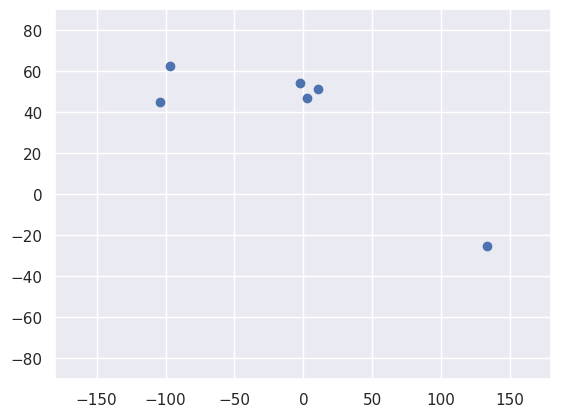

In [3]:
plt.scatter(dataCC['Longitude'],dataCC['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [4]:
x = dataCC.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [5]:
kMeans = KMeans(3)   #produce 2 clusters
kMeans.fit(x)

KMeans(n_clusters=3)

In [6]:
idClusters = kMeans.fit_predict(x)
idClusters

array([2, 2, 1, 1, 1, 0], dtype=int32)

In [7]:
clusteredData = dataCC.copy()
clusteredData['Cluster'] = idClusters
clusteredData

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


<function matplotlib.pyplot.show(close=None, block=None)>

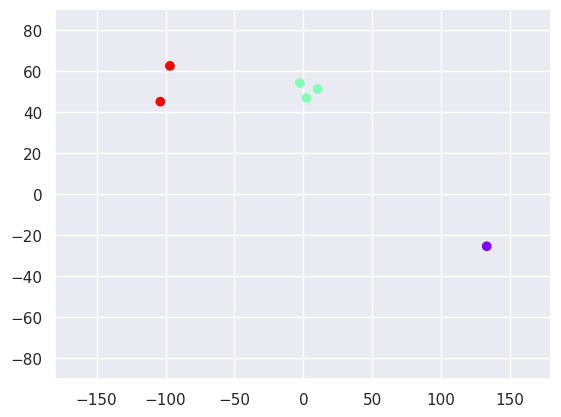

In [8]:
plt.scatter(clusteredData['Longitude'],clusteredData['Latitude'],c=clusteredData['Cluster'],cmap ='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

# 3D Cluster: + Language

In [9]:
dataMapped = dataCC.copy()
dataMapped['Language'] = dataMapped['Language'].map({'English':0,'French':1,'German':2})  #not optimal way
dataMapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [10]:
x = dataMapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


<function matplotlib.pyplot.show(close=None, block=None)>

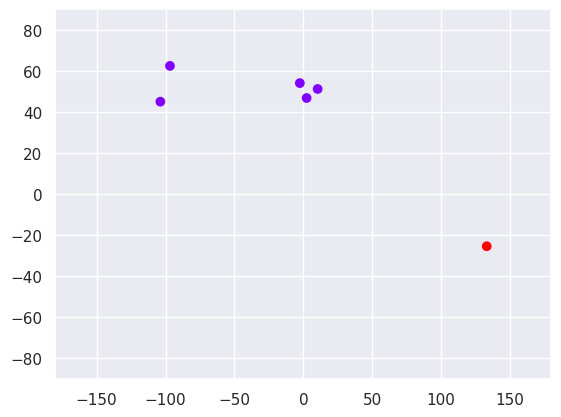

In [11]:
kMeans = KMeans(2)
kMeans.fit(x)

idClusters = kMeans.fit_predict(x)

clusteredData = dataMapped.copy()
clusteredData['Cluster'] = idClusters

plt.scatter(clusteredData['Longitude'],clusteredData['Latitude'],c=clusteredData['Cluster'],cmap ='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## WCSS

In [12]:
kMeans.inertia_

13208.958119999996

In [13]:
wcss = []
for i in range(1,7):
    kMeans=KMeans(i)
    kMeans.fit(x)
    wcss_iter = kMeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster Sum of Squares')

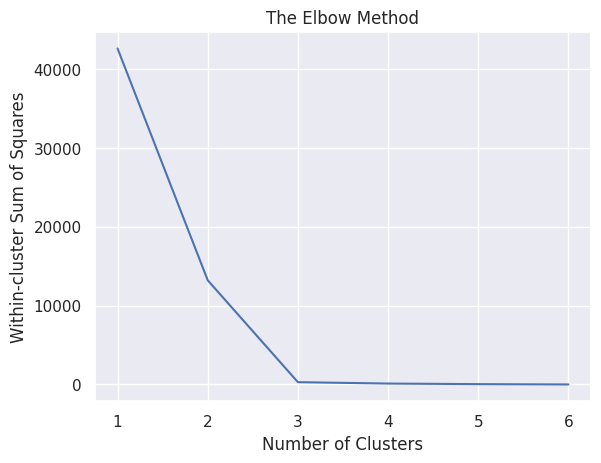

In [14]:
numClust = range(1,7)
plt.plot(numClust,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')            #3 is optimal

# 1) Market Segmentation

In [5]:
dataMS = pd.read_csv('3.12Example.csv')
#satisfaction- self reported 10 is highest. discrete value
#loyalty- continuous range (-2.5,2.5)
dataMS.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Text(0, 0.5, 'Loyalty')

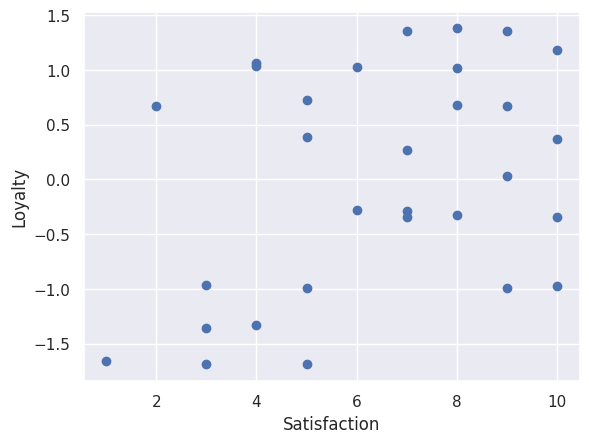

In [6]:
plt.scatter(dataMS['Satisfaction'],dataMS['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Text(0, 0.5, 'Loyalty')

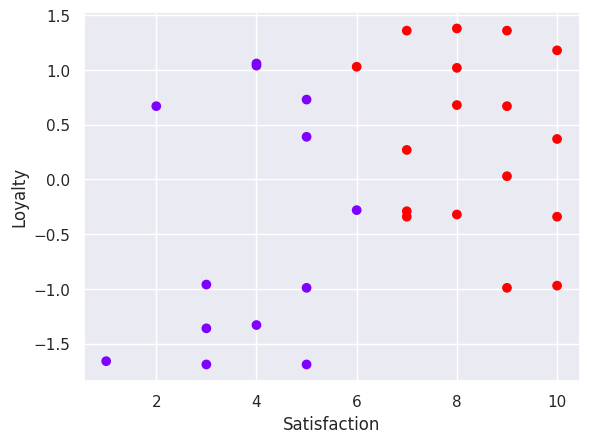

In [7]:
x = dataMS.copy()
kMeans = KMeans(2)
kMeans.fit(x)

clusters = x.copy()
clusters['ClusterPred']=kMeans.fit_predict(x)

plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['ClusterPred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Satisfaction values were not standardized, so they impacted the alg MUCH more

Almost considered the only factor

Clusters seperated across sat=6

### Standarize the Variable

In [8]:
from sklearn import preprocessing
xScaled = preprocessing.scale(x)
xScaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [9]:
wcss = []
for i in range(1,10):
    kMeans = KMeans(i)
    kMeans.fit(xScaled)
    wcss.append(kMeans.inertia_)
    
wcss

[59.99999999999999,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.569489487091782,
 5.363006425346784,
 4.337110750237059,
 3.7523551963246464]

Text(0, 0.5, 'Within-cluster Sum of Squares')

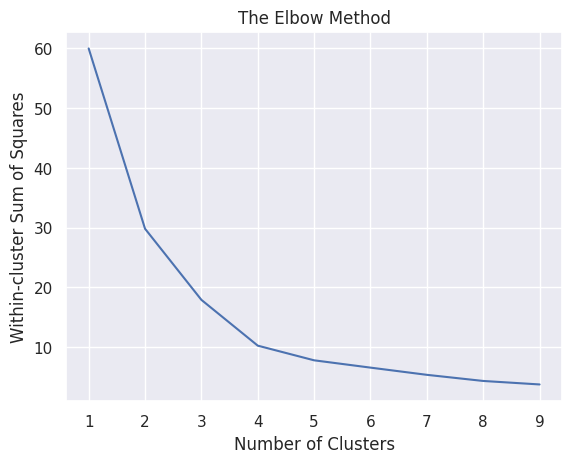

In [10]:
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')        #optimal number is between 2 and 5

Text(0, 0.5, 'Loyalty')

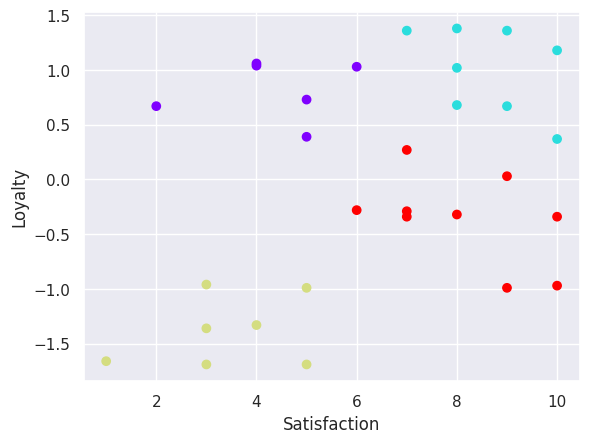

In [17]:
kMeansN = KMeans(4)             #change this # to alter number of clusters
kMeansN.fit(xScaled)
clustersN = x.copy()
clustersN['ClusterPred'] = kMeansN.fit_predict(xScaled)


plt.scatter(clustersN['Satisfaction'], clustersN['Loyalty'], c=clustersN['ClusterPred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# 2) Species Segmentation

The Iris flower dataset is one of the most popular ones for machine learning. You can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

We didn't want to use it in the lectures, but believe that it would be very interesting for you to try it out (and maybe read about it on your own).

### features: sepal length, sepal width, petal length, and petal width.
 - Start by creating 2 clusters
 - Standardize the data and try again. Does it make a difference?
 - Use the Elbow rule to determine how many clusters are there.

In [19]:
dataIris = pd.read_csv('irisDataset.csv')
dataIris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Sepal Width')

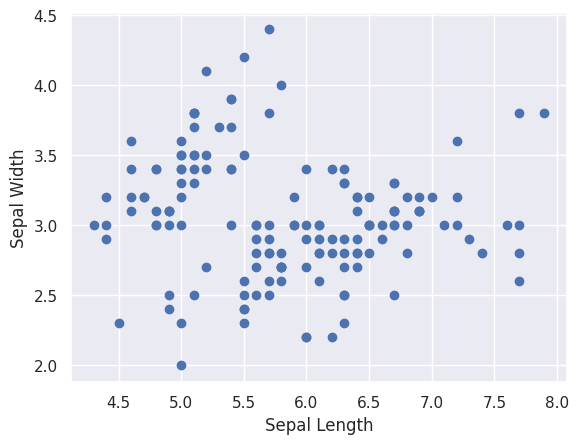

In [20]:
plt.scatter(dataIris['sepal_length'],dataIris['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'sepal_width')

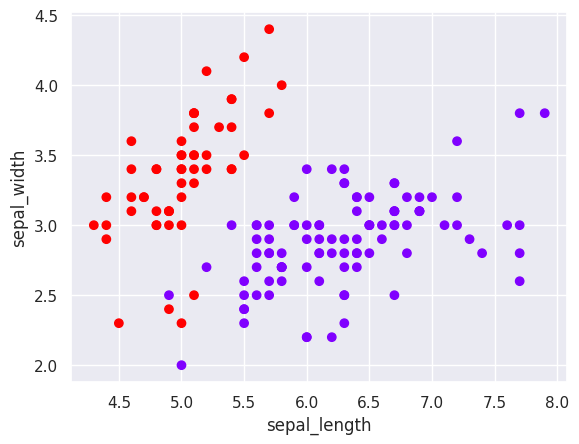

In [23]:
x = dataIris.copy()

kMIris = KMeans(2)
kMIris.fit(x)
clusIris = x.copy()
clusIris['ClusterPred'] = kMIris.fit_predict(x)


plt.scatter(clusIris['sepal_length'], clusIris['sepal_width'], c=clusIris['ClusterPred'], cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

Text(0, 0.5, 'sepal_width')

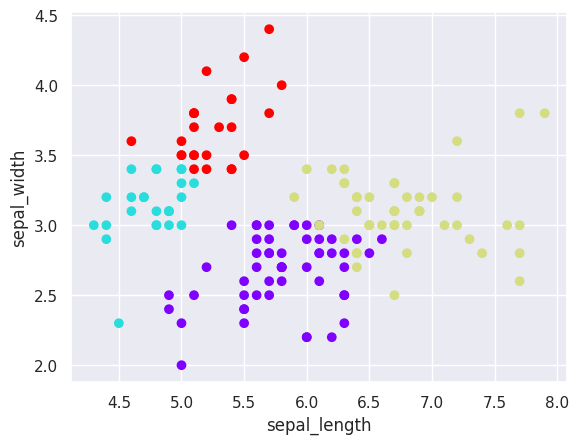

In [29]:
from sklearn import preprocessing
xScaled = preprocessing.scale(x)

kMIris = KMeans(4)
kMIris.fit(xScaled)
clusIris = x.copy()
clusIris['ClusterPred'] = kMIris.fit_predict(xScaled)


plt.scatter(clusIris['sepal_length'], clusIris['sepal_width'], c=clusIris['ClusterPred'], cmap='rainbow')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

Text(0, 0.5, 'Within-cluster Sum of Squares')

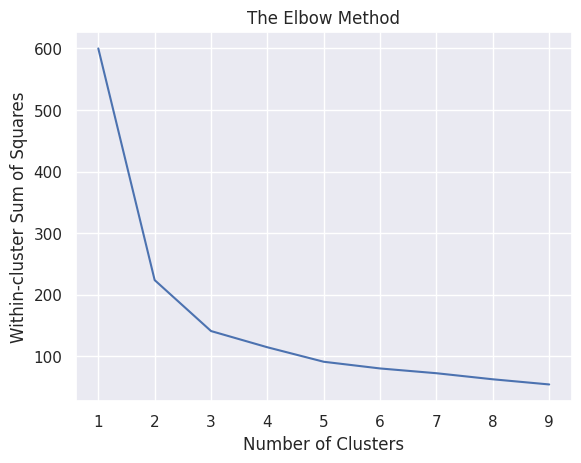

In [27]:
wcss = []
for i in range(1,10):
    kMIris = KMeans(i)
    kMIris.fit(xScaled)
    wcss.append(kMIris.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

# Heatmap

In [4]:
dataCou = pd.read_csv('CountryClustersStandardized.csv', index_col="Country")
dataCou.head()

,Latitude,Longitude,Language
Country,,,
USA,0.186540,-1.089160,0
Canada,0.728588,-1.008604,0
France,0.241895,0.137900,1
UK,0.467671,0.080922,0
Germany,0.378729,0.230360,2


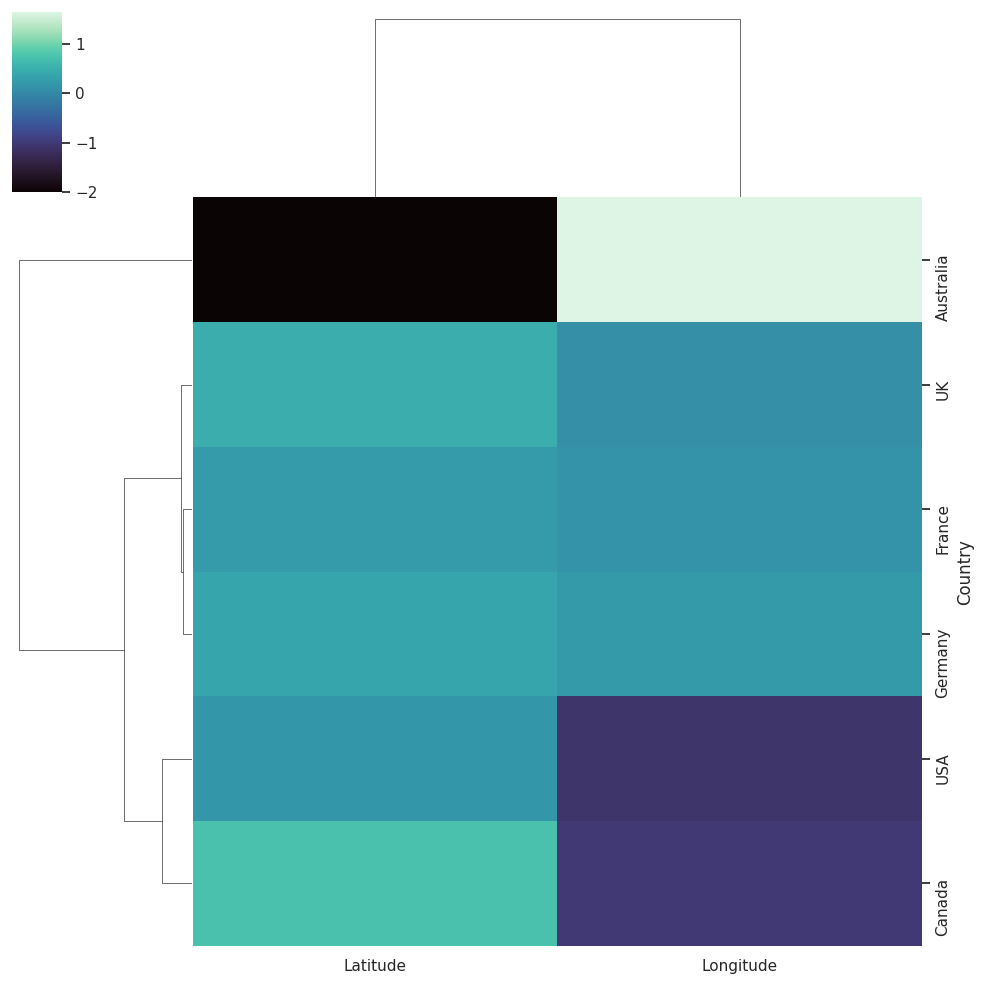

In [6]:
xScaled = dataCou.copy()
xScaled = xScaled.drop(['Language'],axis=1)

sns.clustermap(xScaled, cmap = 'mako')